In [1]:
# Import the necessary libararies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
import re
import os
%matplotlib inline

# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 200)

#set scientific noations 9.8e+11 to 9888777777.1245
pd.options.display.float_format = '{:.4f}'.format 

In [2]:
####################### Define Global Variables ##################################

# Assign the path of the local dir to a variable. 
#This path must be updated, if the notebook is being executed on a different machine.

Local_Dir = r"C:\DS_Learning\Data_Science_IITB\EDA\EDA Case Study\Dataset"


# Store the name of the file in a variable. The file contanins the information about the loan application at the time of applying for the loan.
# The variable must be updated, if a different version of file being used

Loan_App_Data_File = r"\previous_application.csv"
Loan_App_Dataset = str(Local_Dir + Loan_App_Data_File)


#Load the file and create the dataframe
df = pd.read_csv(Loan_App_Dataset, index_col = None) 


In [3]:
# Get the basic information about the Dataset
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,0.1828,0.8673,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low,365243.0000,-134.0000,916.0000,365243.0000,365243.0000,1.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high,365243.0000,-271.0000,59.0000,365243.0000,365243.0000,1.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [4]:
# Get the no of rows and columns
print('\t Previous Application Dataset has {} rows and {} columns ..'.format(df.shape[0],df.shape[1]))

	 Previous Application Dataset has 1670214 rows and 37 columns ..


In [5]:
# Print the datatype of each column of the dataframe
print(df.info())
#print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [6]:
# Get the no of missing values in each column
Null_Pcent = round((df.isnull().sum(axis = 0)/len(df.index)*100),2)
print(Null_Pcent)

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_ANNUITY                   22.2900
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0000
AMT_DOWN_PAYMENT              53.6400
AMT_GOODS_PRICE               23.0800
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
RATE_DOWN_PAYMENT             53.6400
RATE_INTEREST_PRIMARY         99.6400
RATE_INTEREST_PRIVILEGED      99.6400
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_TYPE_SUITE               49.1200
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_

In [7]:
#Get the columns, that have more than 30% of missing values
Null_Pcent = Null_Pcent.loc[Null_Pcent.values > 30]
Null_Pcent.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED    99.6400
RATE_INTEREST_PRIMARY       99.6400
RATE_DOWN_PAYMENT           53.6400
AMT_DOWN_PAYMENT            53.6400
NAME_TYPE_SUITE             49.1200
NFLAG_INSURED_ON_APPROVAL   40.3000
DAYS_TERMINATION            40.3000
DAYS_LAST_DUE               40.3000
DAYS_LAST_DUE_1ST_VERSION   40.3000
DAYS_FIRST_DUE              40.3000
DAYS_FIRST_DRAWING          40.3000
dtype: float64

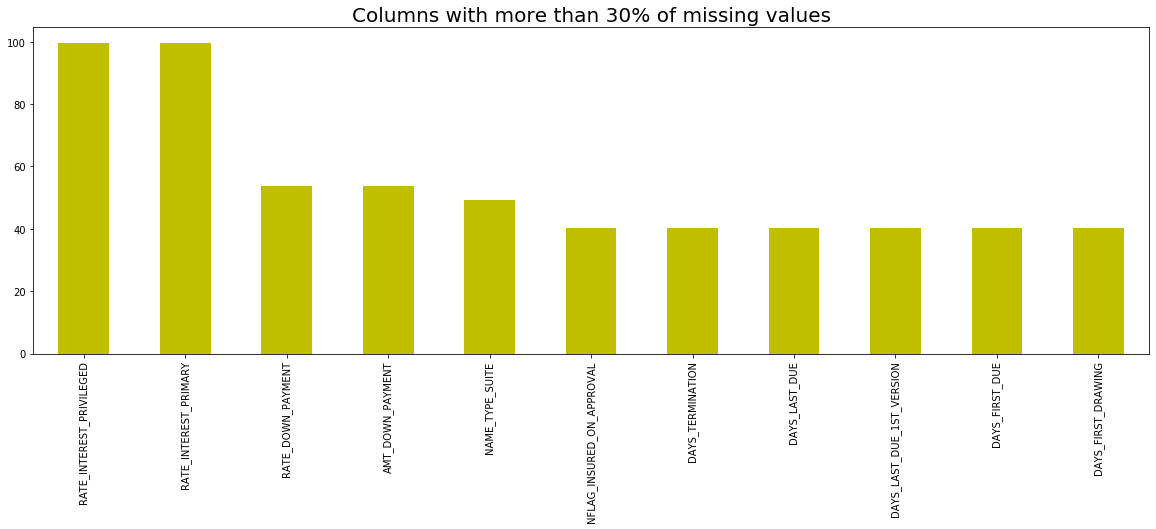

In [8]:
plt.figure(figsize=(20,6))
Null_Pcent.sort_values(ascending = False).plot(kind = 'bar', color = 'y')
plt.title('Columns with more than 30% of missing values', fontsize = 20)
plt.show()

As we can see from the above graph:
- There are 11 columns, that have more than 30% of missing values.
- Some columns have extrement large values such as RATE_INTEREST_PRIVILEGED, RATE_INTEREST_PRIMARY, RATE_DOWN_PAYMENT etc.
- With more than 30% of missing values, these columns are not recommended to use for any anaylsis, without proper treatment/imputation. Since, the no of columns to be treated are high, hence, imputing these columns with arbitrary values like mean, median, mode etc, would be risky and might produce unexpected results. It is better to drop all these columns, but, for this exercise, we only need to drop columns that are having more than 65% of missing values.

In [9]:
# Drop the columns, that have more than 65% of missing values
Null_Pcent_1 = Null_Pcent.loc[Null_Pcent.values > 65]
df.drop(Null_Pcent_1.index, axis = 1, inplace = True)

In [10]:
# Verify, the null values percentage
print(round((df.isnull().sum(axis = 0)/len(df.index)*100),2).sort_values(ascending = False))

RATE_DOWN_PAYMENT             53.6400
AMT_DOWN_PAYMENT              53.6400
NAME_TYPE_SUITE               49.1200
NFLAG_INSURED_ON_APPROVAL     40.3000
DAYS_LAST_DUE                 40.3000
DAYS_LAST_DUE_1ST_VERSION     40.3000
DAYS_FIRST_DUE                40.3000
DAYS_FIRST_DRAWING            40.3000
DAYS_TERMINATION              40.3000
AMT_GOODS_PRICE               23.0800
AMT_ANNUITY                   22.2900
CNT_PAYMENT                   22.2900
PRODUCT_COMBINATION            0.0200
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0000
NAME_CONTRACT_TYPE             0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
SK_ID_CURR                     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
CODE_REJECT_REASON             0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
NAME_CLIENT_

There are few columns wih 22-23% null values, but as a part of this exercise, we do not need to impute them, due to missing relevant functional information and business requirements

***Check, if any of the Object Datatype columns can be treated***

In [11]:
print(round(df.select_dtypes(include = 'object').isnull().sum(axis = 0)/len(df.index)*100,2).sort_values(ascending = False))

NAME_TYPE_SUITE               49.1200
PRODUCT_COMBINATION            0.0200
NAME_YIELD_GROUP               0.0000
NAME_SELLER_INDUSTRY           0.0000
CHANNEL_TYPE                   0.0000
NAME_PRODUCT_TYPE              0.0000
NAME_PORTFOLIO                 0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_CLIENT_TYPE               0.0000
CODE_REJECT_REASON             0.0000
NAME_PAYMENT_TYPE              0.0000
NAME_CONTRACT_STATUS           0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
NAME_CONTRACT_TYPE             0.0000
dtype: float64


***Column NAME_TYPE_SUITE can be treated, let's check what are the unique values in the column***

In [12]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [13]:
df[(df['NAME_TYPE_SUITE'].isnull())]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,SATURDAY,15,Y,1,0.0000,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest,365243.0000,-42.0000,300.0000,-42.0000,-37.0000,0.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,MONDAY,7,Y,1,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle,365243.0000,-482.0000,-152.0000,-182.0000,-177.0000,1.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,THURSDAY,9,Y,1,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
6,2315218,175704,Cash loans,nan,0.0000,0.0000,nan,nan,TUESDAY,11,Y,1,nan,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.0000,0.0000,nan,nan,MONDAY,7,Y,1,nan,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.0000,0.0000,nan,nan,MONDAY,15,Y,1,nan,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.0000,0.0000,nan,nan,SATURDAY,15,Y,1,nan,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
14,2273188,270658,Consumer loans,9644.2200,26550.0000,27252.0000,0.0000,26550.0000,SATURDAY,10,Y,1,0.0000,XAP,Approved,-726,Cash through the bank,XAP,NaN,New,Construction Materials,POS,XNA,Stone,83,Consumer electronics,3.0000,middle,POS household with interest,365243.0000,-693.0000,-633.0000,-633.0000,-627.0000,0.0000
19,1173070,199178,Cash loans,4666.5000,45000.0000,49455.0000,nan,45000.0000,SATURDAY,16,Y,1,nan,Everyday expenses,Refused,-584,XNA,HC,NaN,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,18.0000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
21,1182516,267782,Cash loans,20361.6000,405000.0000,451777.5000,nan,405000.0000,SATURDAY,4,Y,1,nan,XNA,Approved,-686,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,30.0000,low_normal,Cash X-Sell: low,365243.0000,-656.0000,214.0000,365243.0000,365243.0000,1.0000


Column NAME_TYPE_SUITE can be imputed with the value "Unaccompanied", but for this exercise, it is not needed. Hence, leaving it as is

### Columns, that have only 1 unique value are not useful in the analysis and hence, can be removed ###

In [14]:
# Get the count of the values in the left out columns
l_unique = df.nunique()

In [15]:
# Get only those columns, that have only 1 unique value
l_unique = l_unique[l_unique.values == 1]

In [16]:
# Drop such columns
df.drop(labels = list(l_unique.index), inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 35 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRACT_STATUS           1670214 non-null object
DAYS_DECISION                  1670214 non-null int64
NAME_PAY

In [18]:
# Get the rows, which do not have any column populated or all the columns have null values
print(df.isnull().all(axis = 1).sum())

0


### There is no row, where all the columns are null. Hence, no need to delete any rows






### Keep the Relevant Columns ###

Based on the information available in the Data Dictionary, the following columns should be sufficient to analyze the Application dataset.


In [19]:
#Hence, except these, removing all the columns from the dataframe
Rel_Col_List = [ 'SK_ID_PREV' 
, 'SK_ID_CURR'
, 'NAME_CONTRACT_TYPE'
, 'AMT_ANNUITY'
, 'AMT_APPLICATION'
, 'AMT_CREDIT'
, 'AMT_DOWN_PAYMENT'
, 'AMT_GOODS_PRICE'
, 'NAME_CASH_LOAN_PURPOSE'
, 'NAME_CONTRACT_STATUS'
, 'NAME_PAYMENT_TYPE'
, 'CODE_REJECT_REASON'
, 'NAME_CLIENT_TYPE'
, 'NAME_GOODS_CATEGORY'
, 'CNT_PAYMENT']
df = df.loc[:, Rel_Col_List].copy()

In [20]:
# Verify the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
SK_ID_PREV                1670214 non-null int64
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null object
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_DOWN_PAYMENT          774370 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null object
NAME_CONTRACT_STATUS      1670214 non-null object
NAME_PAYMENT_TYPE         1670214 non-null object
CODE_REJECT_REASON        1670214 non-null object
NAME_CLIENT_TYPE          1670214 non-null object
NAME_GOODS_CATEGORY       1670214 non-null object
CNT_PAYMENT               1297984 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 203.9+ MB
None


In [21]:
# Get the high level veiw of the updated dataframe
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,CNT_PAYMENT
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,0.0000,17145.0000,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,12.0000
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,nan,607500.0000,XNA,Approved,XNA,XAP,Repeater,XNA,36.0000
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,nan,112500.0000,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,12.0000
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,nan,450000.0000,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,12.0000
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,nan,337500.0000,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,24.0000


Column CNT_PAYMENT is defined as float, but, it should be integer, as no of payments, cannot be in decimal values, hence, changing its datatype to Integer.

In [22]:
# First, impute the Missing Values with '0' 
df['CNT_PAYMENT'].fillna('0', inplace = True)

# Convert the column to Int
df['CNT_PAYMENT'] = df['CNT_PAYMENT'].astype('int')

In [23]:
# Get the high level veiw of the updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
SK_ID_PREV                1670214 non-null int64
SK_ID_CURR                1670214 non-null int64
NAME_CONTRACT_TYPE        1670214 non-null object
AMT_ANNUITY               1297979 non-null float64
AMT_APPLICATION           1670214 non-null float64
AMT_CREDIT                1670213 non-null float64
AMT_DOWN_PAYMENT          774370 non-null float64
AMT_GOODS_PRICE           1284699 non-null float64
NAME_CASH_LOAN_PURPOSE    1670214 non-null object
NAME_CONTRACT_STATUS      1670214 non-null object
NAME_PAYMENT_TYPE         1670214 non-null object
CODE_REJECT_REASON        1670214 non-null object
NAME_CLIENT_TYPE          1670214 non-null object
NAME_GOODS_CATEGORY       1670214 non-null object
CNT_PAYMENT               1670214 non-null int32
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 197.5+ MB


### Data Analysis

To start with, let's understand the objective of the analysis clearly and identify the variables that we want to consider for analysis.

The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 

Let's have a look at the target variable - NAME_CONTRACT_STATUS. We need to relabel the values to a binary form - 0 or 1, 1 = Late payment/defaulter and 0 otherwise.

In [24]:
# Convert type to category
df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].astype('category')
df['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

- Canceled and Unused Offer are of no use, hence, get rid of these records 

In [25]:
df = df[(df['NAME_CONTRACT_STATUS'] != 'Canceled') & (df['NAME_CONTRACT_STATUS'] != 'Unused offer')]

In [26]:
# Convert the NAME_CONTRACT_STATUS to a boolean
df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].apply(lambda x : 0 if x == 'Approved' else 1)

In [27]:
df['NAME_CONTRACT_STATUS'] = df['NAME_CONTRACT_STATUS'].astype(int)

In [28]:
df1 = df.copy()

In [29]:
# Reverify the column
df['NAME_CONTRACT_STATUS'].value_counts()

0    1036781
1     290678
Name: NAME_CONTRACT_STATUS, dtype: int64

## Univariate Analysis of Categorical Variables

In [30]:
# First, check the percentage of previous applications, that got accepeted
round(df['NAME_CONTRACT_STATUS'].mean(),2)

0.22

The overall Rejection Rate is 22%

In [31]:
# Create a function plt_univariate to plot graph for variables for univariate analysis
def plt_univariate(ldf, lvar, lhue, lrot):
    #plt.figure(figsize = (20,15))
    l_temp = pd.Series(data = lhue)
    fig, ax = plt.subplots()
    fig.set_size_inches(15 , 10)
    plt.yscale('log')
    ax = sns.countplot(x = lvar, hue = lhue, order = df[lvar].value_counts().index, data = ldf)
    l_title = 'Univariate Analysis of ' + lvar
    plt.title(l_title, fontsize = 15)
    
    if len(l_temp.unique()) > 0:
        for l in ax.patches:
                ax.annotate('{:1.1f}%'.format((l.get_height()*100)/float(len(ldf))), (l.get_x()+0.1, l.get_height()+20))
    else:
        for l in ax.patches:
                ax.annotate(l.get_height(), (l.get_x()+0.32, l.get_height()+20))
    if lrot:
        plt.xticks(rotation=90)    
    plt.show()
    

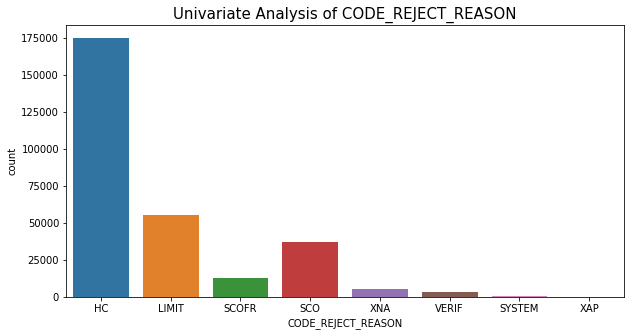

In [32]:
# plot CODE_REJECT_REASON against the Refused applications
plt.figure(figsize = (10,5))
sns.countplot(x = 'CODE_REJECT_REASON', data = df[df['NAME_CONTRACT_STATUS'] == 1] )
l_title = 'Univariate Analysis of ' + 'CODE_REJECT_REASON'
plt.title(l_title, fontsize = 15)
plt.show()

- 60% applications got rejected due to the Reasone Code "HC"

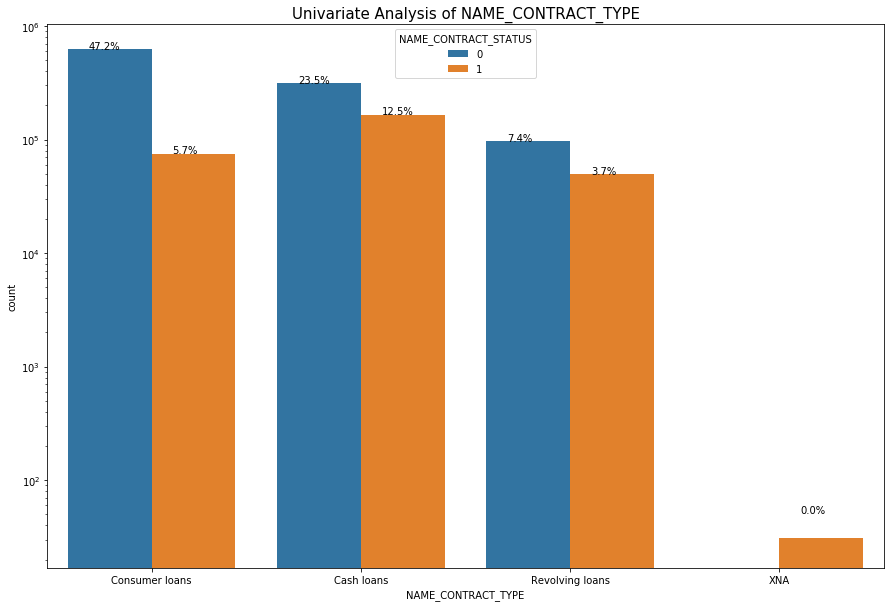

In [33]:
# Plot NAME_CONTRACT_TYPE
plt_univariate(df, 'NAME_CONTRACT_TYPE', 'NAME_CONTRACT_STATUS', 0)

- Approximately 600000(47.2%) applications got Approved, while ~80000(5.7%) got rejected for Consumer loans
- Approximately 300000(23.5%) applications got Approved, while ~170000(12.5%) got rejected for Cash loans
- Approximately 70000(7.4%) applications got Approved, while ~40000(3.7%) got rejected for Revolving loans

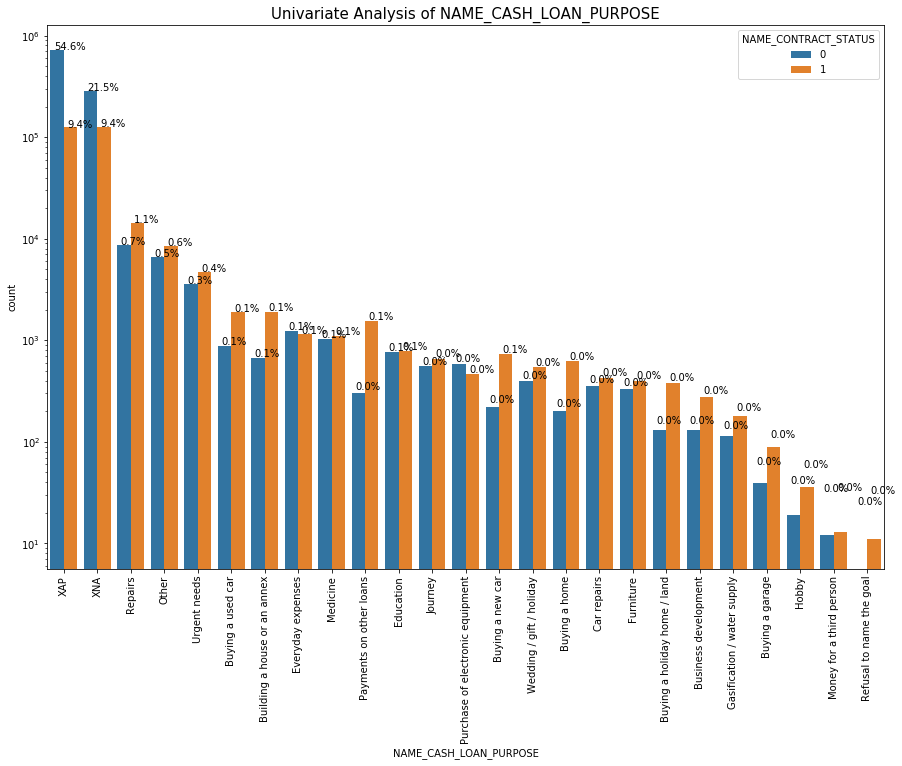

In [34]:
#plot NAME_CASH_LOAN_PURPOSE
plt_univariate(df, 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 1)

- There are loan purposes called XAP, XNA with high default rates or rejected applications. The business meaning of
  these types are not known at this point in time.
- All other loan purposes are neglible.

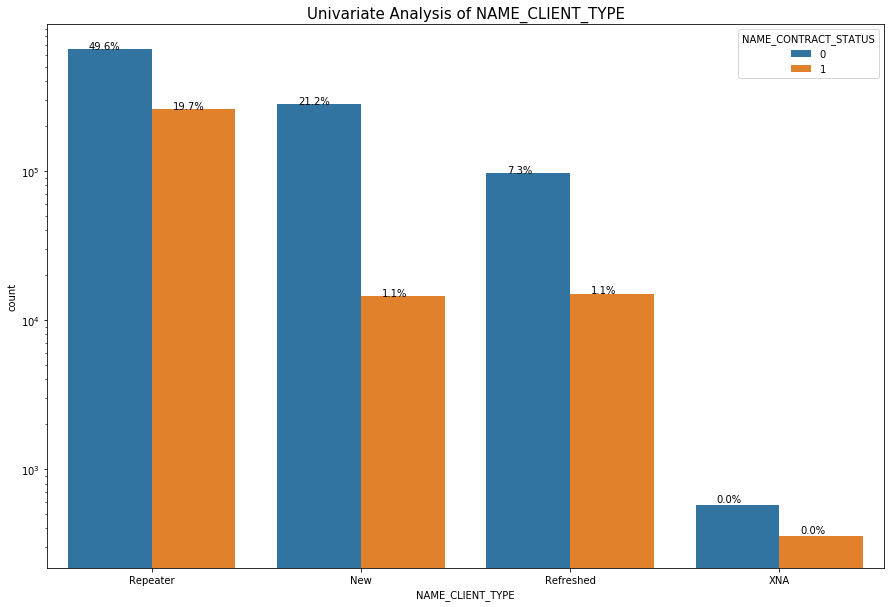

In [35]:
#plot NAME_CLIENT_TYPE
plt_univariate(df, 'NAME_CLIENT_TYPE', 'NAME_CONTRACT_STATUS', 0)

- 49.6% applications are rejected for the clients, who had previously applied or are repeater.
- 21.2% new applicants have been rejected.
- 7.3% of refreshed got rejected.

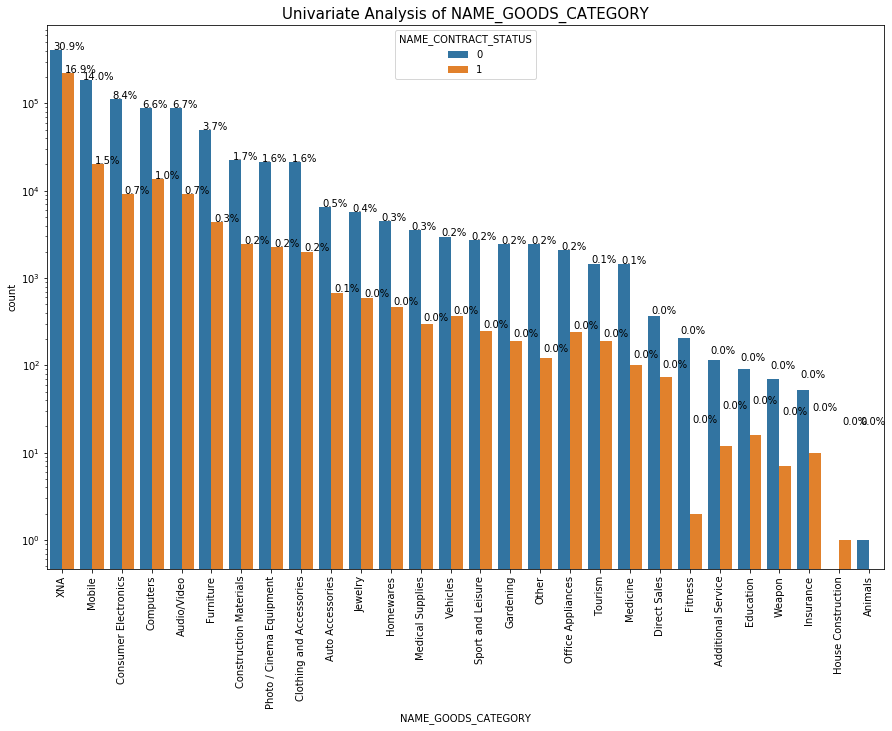

In [36]:
#plot NAME_GOODS_TYPE
plt_univariate(df, 'NAME_GOODS_CATEGORY', 'NAME_CONTRACT_STATUS', 1)

- 30.9% applications for unknown resons rejected
- 14% applicants, who applied for loan to buy a mobile rejected

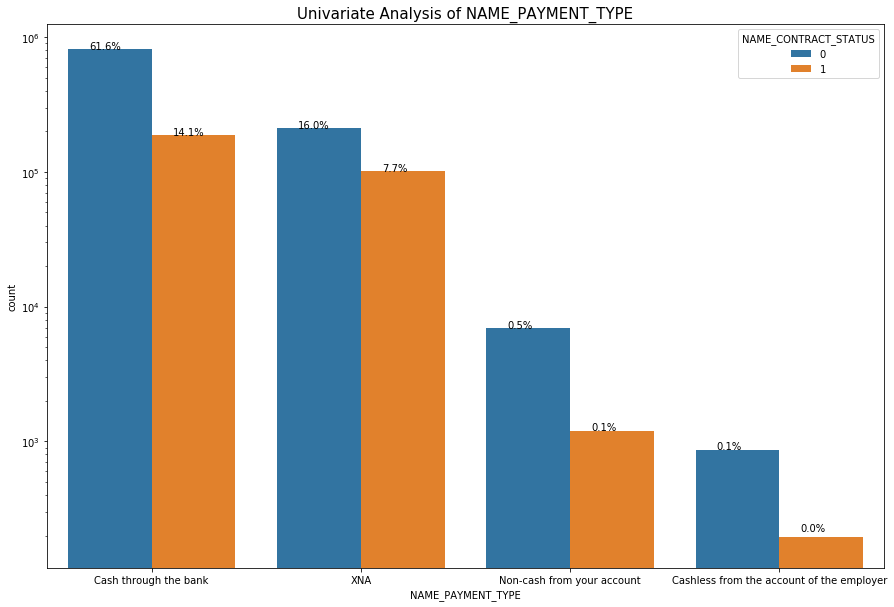

In [37]:
#plot NAME_PAYMENT_TYPE
plt_univariate(df, 'NAME_PAYMENT_TYPE', 'NAME_CONTRACT_STATUS', 0)

- 61.6% applications were rejected, where the applicants chose to repay the loan via "Cash throgh the bank" payment method.
- "Cashless from the employer accont" had the lowest rejection rate(0.1%)

## Univariate Analysis of Cotinous/Numeric Variables

In [38]:
df['AMT_CREDIT'].fillna(0, inplace = True)

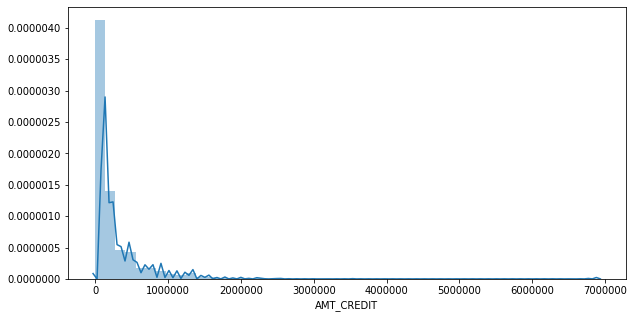

In [39]:
# Plot AMT_CREDIT
plt.figure(figsize = (10,5))
sns.distplot(df['AMT_CREDIT'])
plt.show()

Now, bin the variable into the following 4 discrete categories. This will help us in analyzing - Loan Amount varies across other variables such as Target(Default Rate), Income of the applicant etc
- Low
- Medium
- High
- Very High


In [40]:
# Define a local function, which will be used to bin the Credit/Loan Amount
def bin_cont_var(l_amount):
    if l_amount < 250000:
        return 'Low'
    elif l_amount > 250000 and l_amount < 750000:
        return 'Medium'
    elif l_amount > 750000 and l_amount < 1250000:
        return 'High'
    else:
        return 'Very High'

In [41]:
df['AMT_CREDIT'] = df['AMT_CREDIT'].apply(lambda x : bin_cont_var(x))

In [42]:
df['AMT_CREDIT'].value_counts()

Low          976569
Medium       245436
High          67892
Very High     37562
Name: AMT_CREDIT, dtype: int64

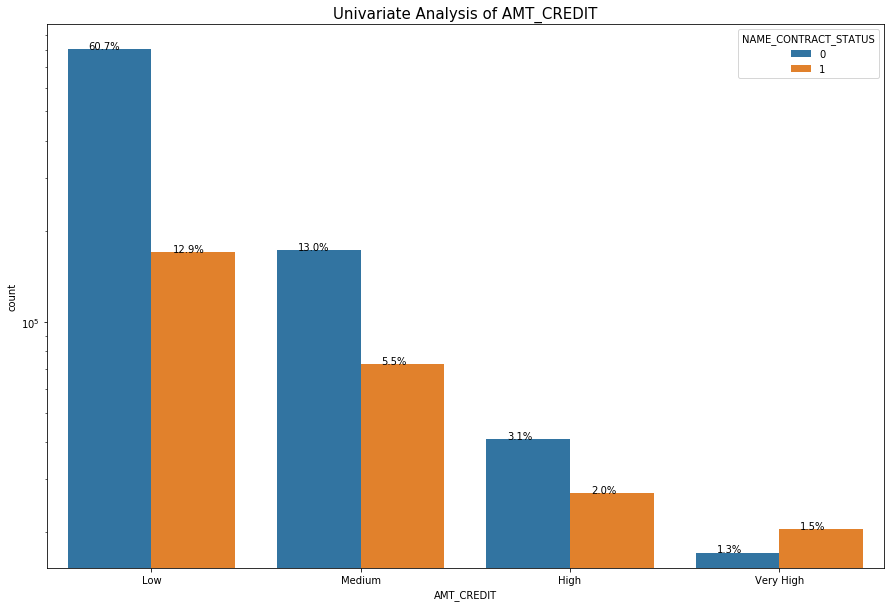

In [43]:
#plot NAME_PAYMENT_TYPE
plt_univariate(df, 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 0)

- 60.7% of appplications for low amount loan rejected, while 12.9% were accepted.
- 1.3% applications for very high low amount rejected

In [44]:
# Crete a function to plot Continuous variables
def plt_num_univariate(ldf, lvar):
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(15,5))
    ax[0].set_title("Distribution Plot for " + lvar)
    sns.distplot(ldf[lvar],ax=ax[0])
    ax[1].set_title("Violin Plot for " + lvar)
    sns.violinplot(data = ldf, x= lvar, ax = ax[1], inner = "quartile")
    plt.show()

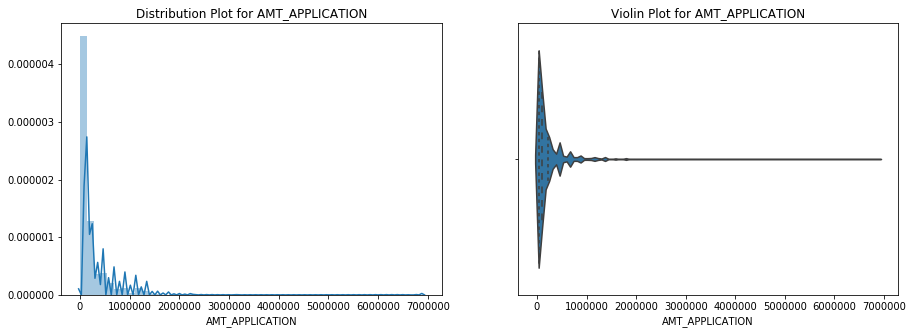

In [45]:
# Plot for AMT_APPLICATION
plt_num_univariate(df, 'AMT_APPLICATION')

- Most of the requested loans are distributed between 5000000 and 8000000

In [46]:
# Bin AMT_APPLICATION into 4 ranges
df['AMT_APPLICATION'] = df['AMT_APPLICATION'].apply(lambda x : bin_cont_var(x))

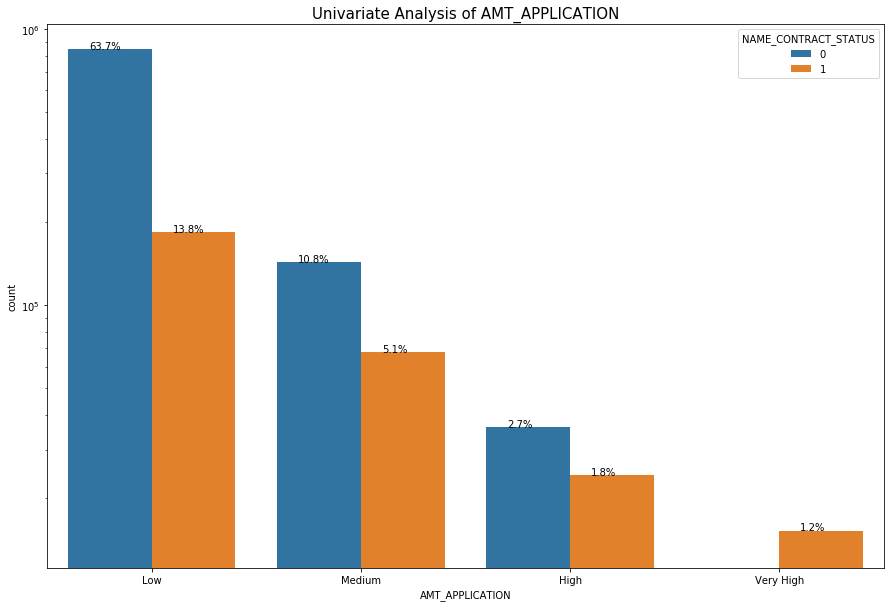

In [47]:
plt_univariate(df, 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 0)

- 63.7% of the applications for low amount loan rejected.
- None of the Very high loan applications was rejected.
- All the applications for the requested very high loan were accepted

In [48]:
df['AMT_ANNUITY'].fillna(0, inplace = True)

In [49]:
df['AMT_ANNUITY'].describe()

count   1327459.0000
mean      15353.9145
std       14723.1518
min           0.0000
25%        5843.3625
50%       10841.8950
75%       20007.4500
max      418058.1450
Name: AMT_ANNUITY, dtype: float64

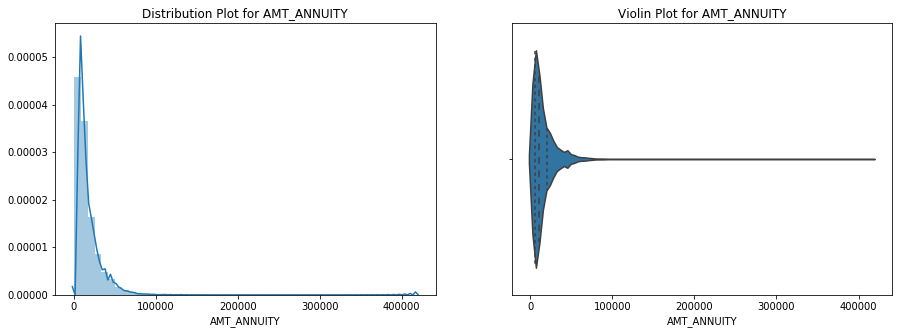

In [50]:
# Plot for AMT_ANNUITY
plt_num_univariate(df, 'AMT_ANNUITY')

- Most of the Annuity Amounts are distirbuted between 10000 and 20000

In [51]:
def bin_cont_var_1(l_amount):
    if l_amount < 5000:
        return 'Low'
    elif l_amount > 5000 and l_amount < 15000:
        return 'Medium'
    elif l_amount > 15000 and l_amount < 25000:
        return 'High'
    else:
        return 'Very High'

In [52]:
# Bin AMT_ANNUITY into 4 ranges
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].apply(lambda x : bin_cont_var_1(x))

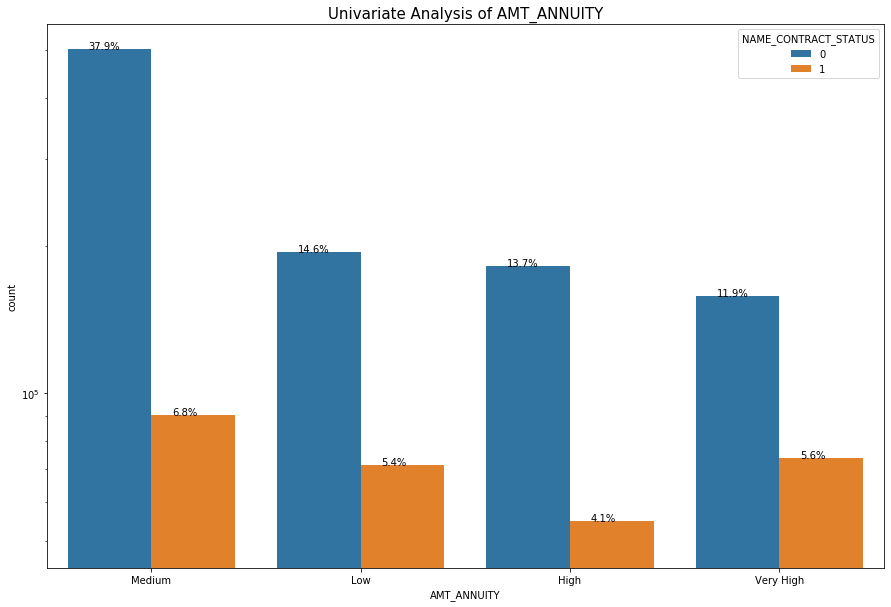

In [53]:
plt_univariate(df, 'AMT_ANNUITY', 'NAME_CONTRACT_STATUS', 0)

- 37.9% applications(between 5000 and 15000) with medium Annuity amount were rejected.
- There was only 11.9% of refusal in the very high category(>25000)

In [54]:
df['CNT_PAYMENT'].describe()

count   1327459.0000
mean         15.3961
std          14.4435
min           0.0000
25%           6.0000
50%          12.0000
75%          18.0000
max          84.0000
Name: CNT_PAYMENT, dtype: float64

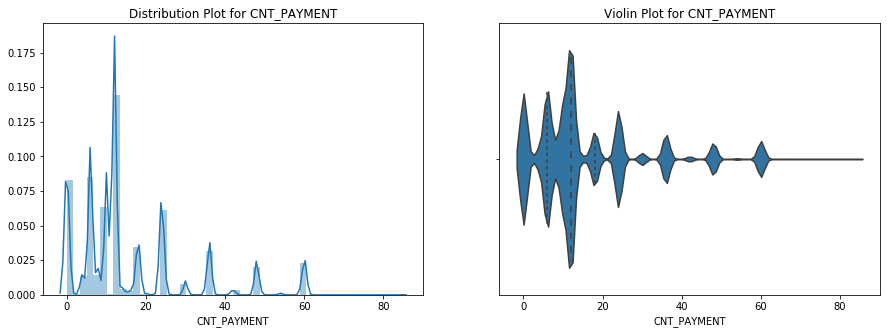

In [55]:
# Plot for AMT_ANNUITY
plt_num_univariate(df, 'CNT_PAYMENT')

- Most of the loan terms are distributed between 12 and 18

In [56]:
def bin_cont_var_2(l_term):
    if l_term < 6 :
        return '6 Months'
    elif l_term > 6 and l_term < 12:
        return '12 Months'
    elif l_term > 12 and l_term < 18:
        return '18 Months'
    elif l_term > 18 and l_term < 24:
        return '24 Months'
    elif l_term > 24 and l_term < 30:
            return '30 Months'
    elif l_term > 30 and l_term < 36:
            return '30 Months'
    else:
        return '>36 Months'
            
    

In [57]:
# Bin CNT_PAYMENT 
df['CNT_PAYMENT'] = df['CNT_PAYMENT'].apply(lambda x : bin_cont_var_2(x))

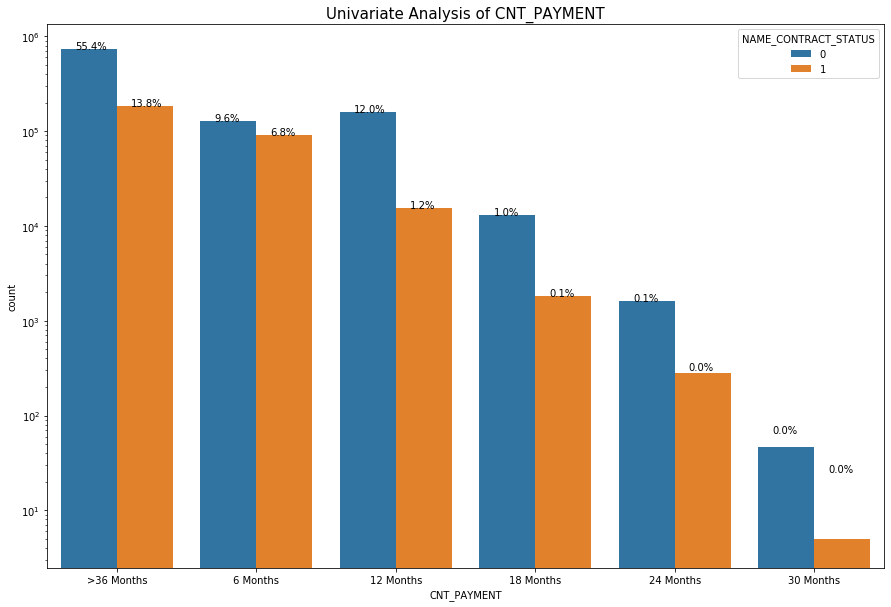

In [58]:
plt_univariate(df, 'CNT_PAYMENT', 'NAME_CONTRACT_STATUS', 0)

- Loan term of more than 36 months had the highest rejection rate(55.4%). It also had the highest acceptance rate(13.8%) among others

### Bivariate/Mutivariate Analysis

In [59]:
#Write a function which takes a categorical variable and plots the Refusal Rate segmented by purpose 
def plt_bivariate(df, lvar1, lvar2, lhue):
    plt.figure(figsize=(10, 6))
    sns.barplot(x = lvar1, y = lvar2,  data=df)
    l_title = 'Bivariate Analysis of ' + lvar1 + '&' + lvar2
    plt.show()

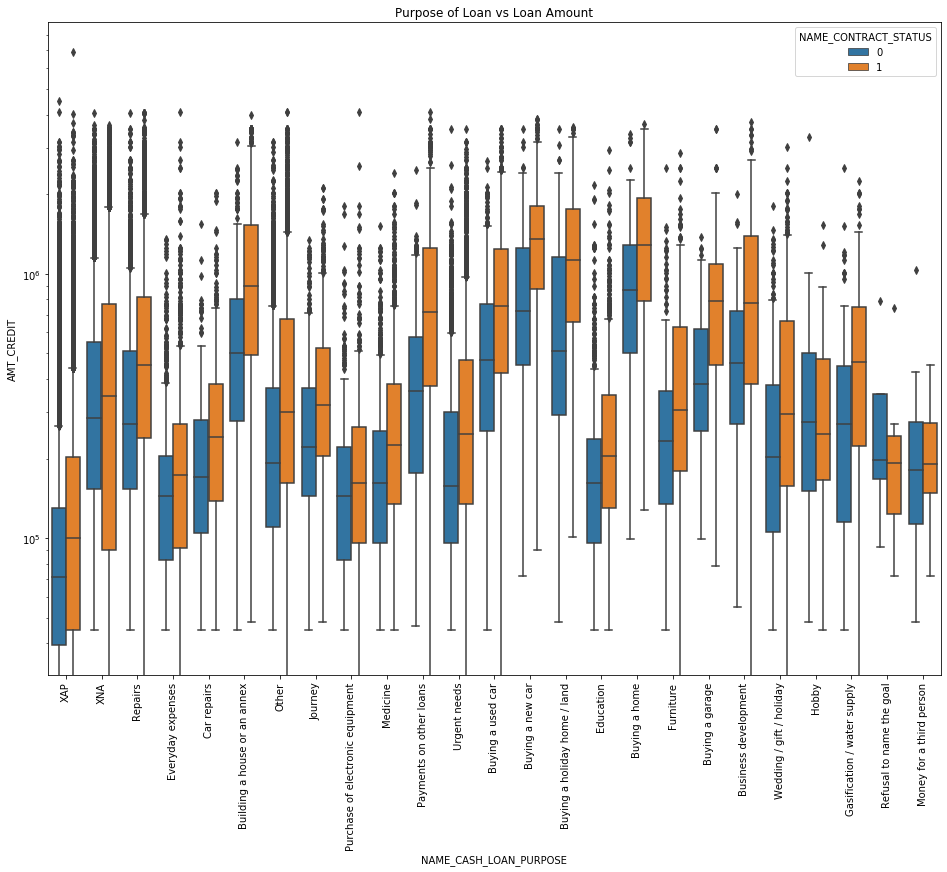

In [60]:
plt.figure(figsize=(16,12))
sns.boxplot(data = df1, x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT', hue ='NAME_CONTRACT_STATUS')
plt.title('Purpose of Loan vs Loan Amount')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

- There are so many outliers present in the dataset, but we are not suppose to treat them as part of this exercise.
- Buying a new car, buying a holiday home/land, Building a new house etc have high loam amounts and refusal rates

### Check the correlation of all Continuous variables

In [61]:
# Get all the numeric datatype in a list
l_num_list = ['CNT_PAYMENT', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT']

In [62]:
# Find the correations for Numerice Columns for Target = 1
df1_corr = df1.loc[:, l_num_list].corr()
df1_c1 = df1_corr.unstack()

# Print the correlations in the descending order
print(df1_c1.sort_values(ascending = False))

AMT_DOWN_PAYMENT  AMT_DOWN_PAYMENT   1.0000
AMT_GOODS_PRICE   AMT_GOODS_PRICE    1.0000
AMT_CREDIT        AMT_CREDIT         1.0000
AMT_ANNUITY       AMT_ANNUITY        1.0000
AMT_APPLICATION   AMT_APPLICATION    1.0000
CNT_PAYMENT       CNT_PAYMENT        1.0000
AMT_GOODS_PRICE   AMT_APPLICATION    0.9999
AMT_APPLICATION   AMT_GOODS_PRICE    0.9999
AMT_GOODS_PRICE   AMT_CREDIT         0.9930
AMT_CREDIT        AMT_GOODS_PRICE    0.9930
                  AMT_APPLICATION    0.9728
AMT_APPLICATION   AMT_CREDIT         0.9728
AMT_ANNUITY       AMT_GOODS_PRICE    0.8207
AMT_GOODS_PRICE   AMT_ANNUITY        0.8207
AMT_ANNUITY       AMT_CREDIT         0.8159
AMT_CREDIT        AMT_ANNUITY        0.8159
AMT_APPLICATION   AMT_ANNUITY        0.8083
AMT_ANNUITY       AMT_APPLICATION    0.8083
AMT_APPLICATION   CNT_PAYMENT        0.6815
CNT_PAYMENT       AMT_APPLICATION    0.6815
AMT_CREDIT        CNT_PAYMENT        0.6755
CNT_PAYMENT       AMT_CREDIT         0.6755
                  AMT_GOODS_PRIC

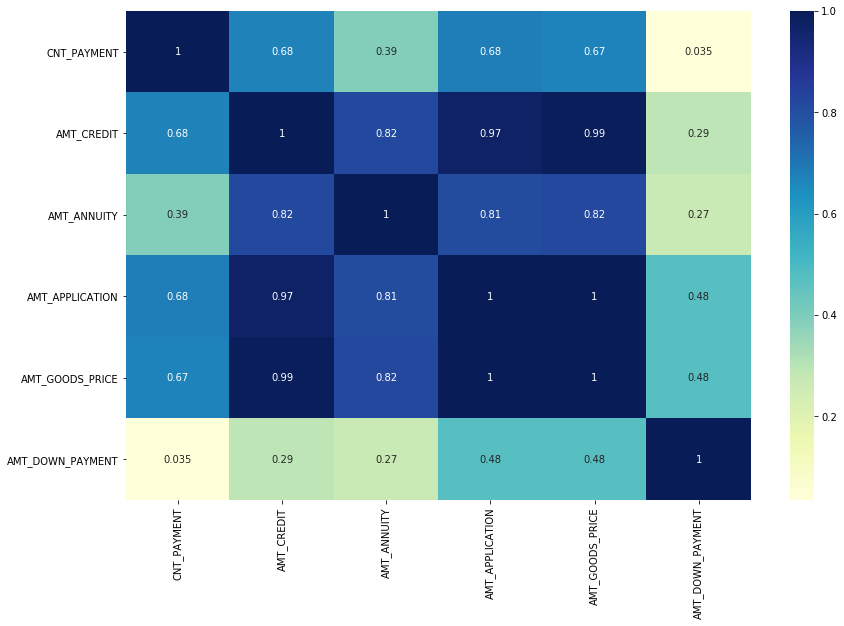

In [63]:
# Plot the heatmap of all the continuos variables
plt.subplots(figsize=(14, 9))
sns.heatmap(df1_corr, xticklabels=df1_corr.columns.values, 
            yticklabels=df1_corr.columns.values, annot= True, cmap="YlGnBu")
plt.show()

- It is clear from the heatmap that the variables, AMT_GOODS_PRICE, AMT_APPLICATION, AMT_CREDIT, AMT_ANNUITY are very
  closely interrelated. Therefore, any of these column can be taken for analysis

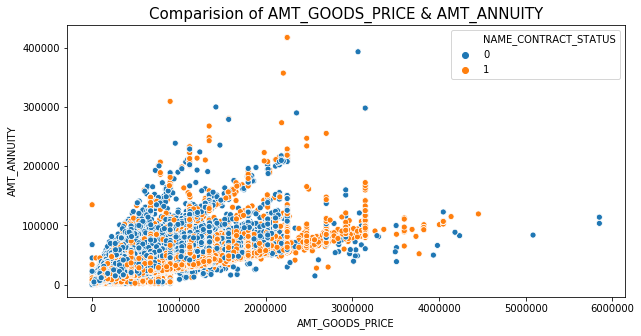

In [64]:
# Scatter Plot for AMT_GOODS_PRICE and AMT_ANNUITY
plt.figure(figsize = (10,5))
sns.scatterplot(df1['AMT_GOODS_PRICE'], df1['AMT_ANNUITY'], hue = df1['NAME_CONTRACT_STATUS'])
plt.title('Comparision of AMT_GOODS_PRICE & AMT_ANNUITY' , fontsize = 15)
plt.show()

- There is a high correlation between Annuity Amount and the price of the goods of the clients.
- Higher the value of the Goods, higher is the Annuity amount.


In [65]:
# Create a new function called plt_bivariate, which will perform the bivaraiate analysis for the given input variables
# Please note - we have not removed outliers from most of the variables as part of this exercise, hence, unsing MEDIAN
def plt_bivariate(ldf, lvar1, lvar2, ltype, lhue):
    from numpy import median
    plt.figure(figsize = (15,10))
    l_title = "Comparision of " + lvar1 + " & " + lvar2 
    if not lhue:
        sns.barplot(x = lvar1, y = lvar2, data = ldf, estimator = median)
    else:
        sns.barplot(x = lvar1, y = lvar2, hue = lhue, data = ldf, estimator = median)
    plt.title(l_title, fontsize = 15)
    if ltype == '0':
        plt.xticks(rotation = 90)
    plt.show()
    

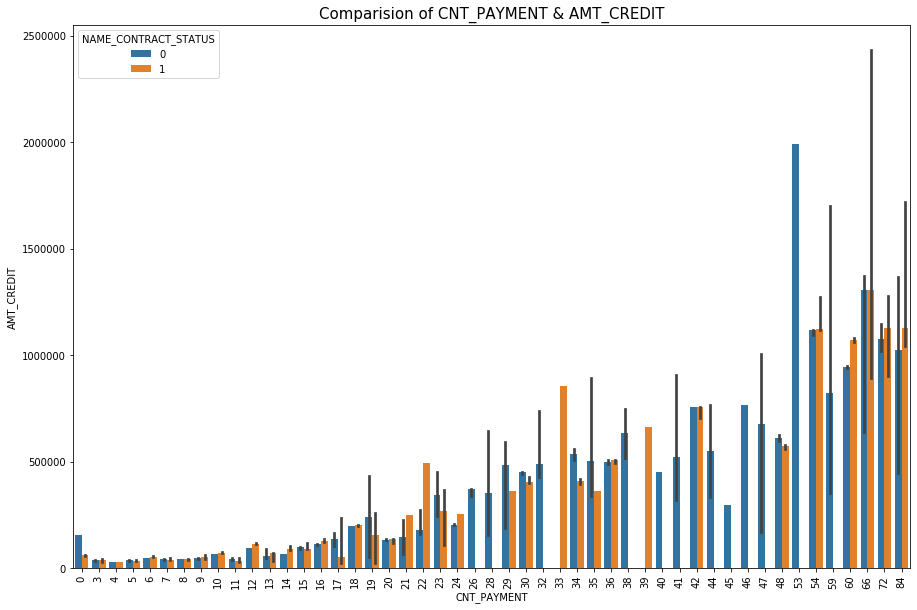

In [66]:
# Analyis for AMT_INCOME and CNT_CHILDRENS for Target = 1
plt_bivariate(df1, 'CNT_PAYMENT', 'AMT_CREDIT', '0', 'NAME_CONTRACT_STATUS')

- Higher the Loan amount, higher is the loan term or no of payments

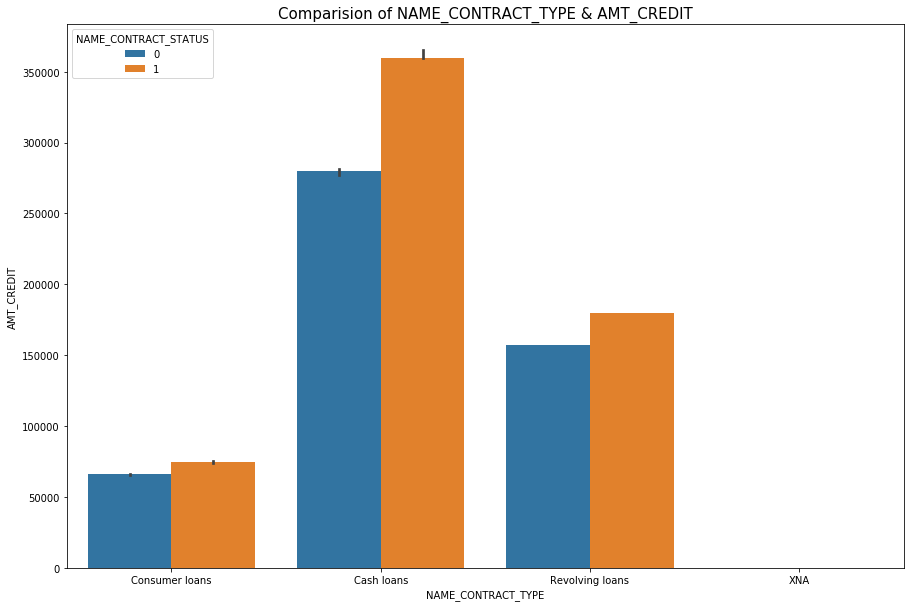

In [67]:
# Analyis for NAME_CONTRACT_TYPE and AMT_CREDIT 
plt_bivariate(df1, 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', '1', 'NAME_CONTRACT_STATUS')

- The average cash loan amount, that got rejected is ~340000
- The average cosumer loan, that got rejects is  ~70000
- Revolving loans are floating around 170000

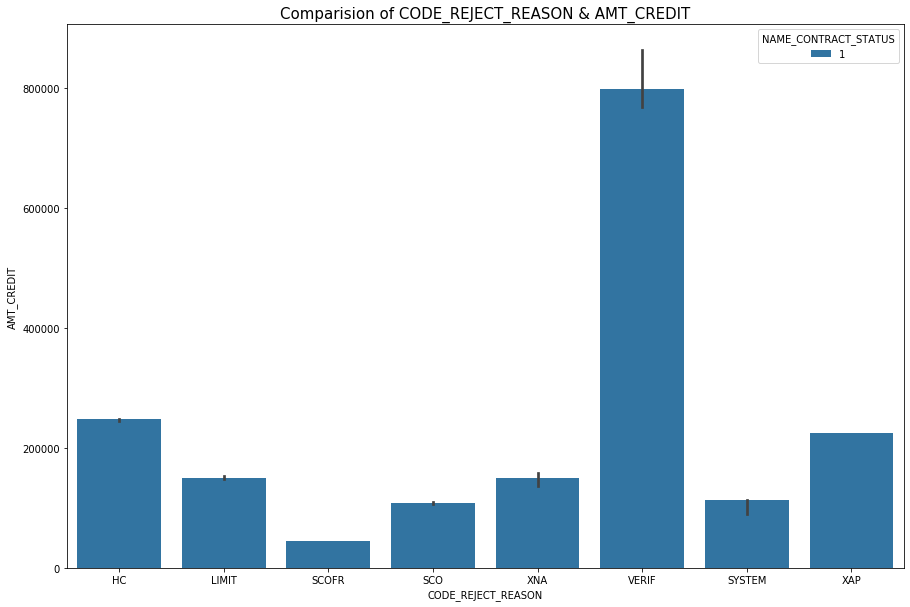

In [68]:
# Analyis for NAME_CONTRACT_TYPE and AMT_CREDIT 
plt_bivariate(df1[df1['NAME_CONTRACT_STATUS'] == 1], 'CODE_REJECT_REASON', 'AMT_CREDIT', '1', 'NAME_CONTRACT_STATUS')

- Most of the higher amount loans were rejected with reason code 'VERIF'
- Reason code 'SCOFR' had the lowest average loan

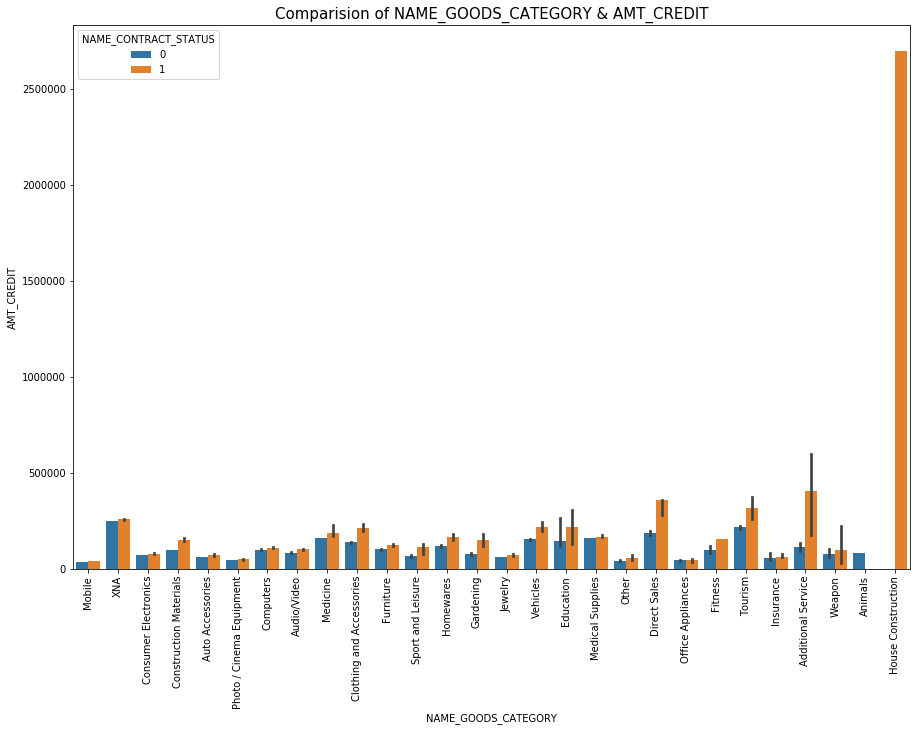

In [69]:
# Analyis for NAME_CONTRACT_TYPE and AMT_CREDIT 
plt_bivariate(df1, 'NAME_GOODS_CATEGORY', 'AMT_CREDIT', '0', 'NAME_CONTRACT_STATUS')

- House construction has the highest average(~2600000) loan amout and all of them were rejected

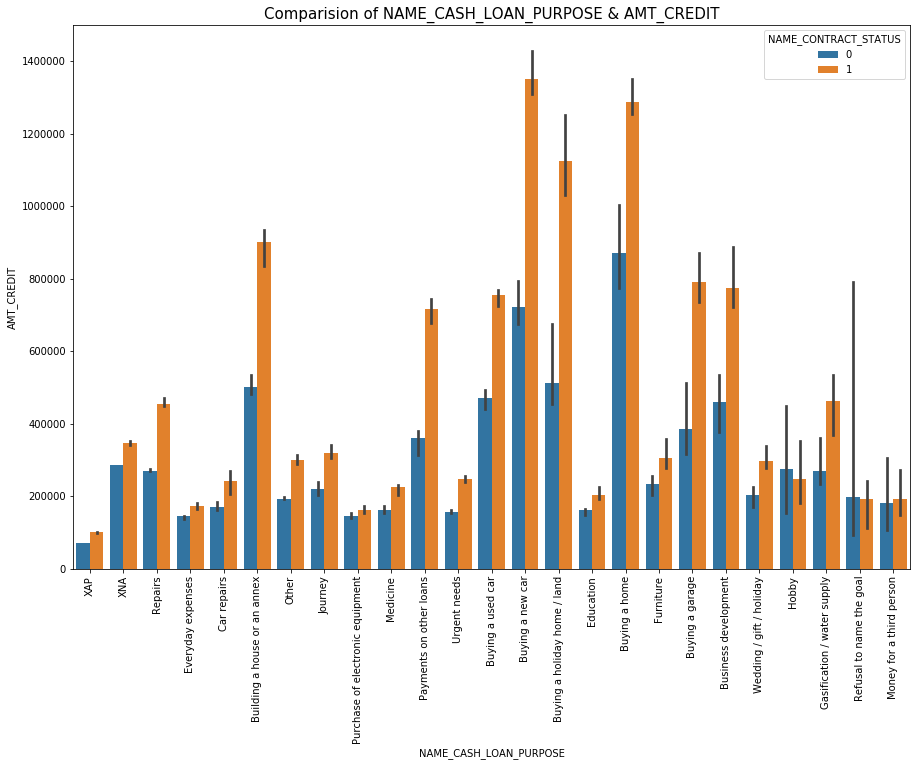

In [70]:
# Analyis for NAME_CONTRACT_TYPE and AMT_CREDIT 
plt_bivariate(df1, 'NAME_CASH_LOAN_PURPOSE', 'AMT_CREDIT', '0', 'NAME_CONTRACT_STATUS')

- Buying a new car, Buying a holiday home, building a house have higher average loan amount varies from ~900000 to ~ 1300000
- These type of cash loans have very high refusal rate

## Conclusion

### The top 5 variables to be considered for Loan Prediction are:

- Amount of Loan
   - As seen in the analysis, if the loan amount is high, the application gets rejected.
- Purpose of Loan
   - This is very important variable, as observed, if the purpose of cash loan is for buying a car, building a new
     holiday home, then the application is very likely to get rejected.
- Term of the loan
    - More than 55% applicants applied for more than 36 Months of payment and mostly got rejected.
- Type of employment
    - As per the analysis - the low skilled laborers have the most difficulty in making repayment
- Income of the Applicants
     - If the income of the applicants is low, then he/she is more likely to be defaulter. As seen in the analysis  
        Working class has the most difficulty in the making repayment